# Сравнение пользователей сервиса аренды самокатов GoFast 

## Описание проекта

В нашем распоряжении информация от сервиса аренды самокатов GoFast: данные о некоторых пользователях из нескольких городов, а также об их поездках. 

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.  
1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.  
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
3. Нужно проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
ыПроанализируем данные и проверим  гипотезы, которые могут помочь бизнесу вырасто

Так же нужно продумать теоретическую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы.  .

### Описание данных

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением, сервисом можно пользоваться:
1. без подписки:
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra:
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

В основных данных есть информация о:  
пользователях(`users_go.csv`),   
их поездках(`rides_go.csv`),  
подписках(`subscriptions_go.csv`).  

Пользователи:  
`user_id` - уникальный идентификатор пользователя  
`name` - имя пользователя  
`age` - возраст  
`city` - город  
`subscription_type` - тип подписки (free, ultra)  

Поездки:  
`user_id` - уникальный идентификатор пользователя  
`distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)  
`duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»  
`date`- дата совершения поездки  

Подписки:  
`subscription_type` - тип подписки  
`minute_price` - стоимость одной минуты поездки по данной подписке  
`start_ride_price` - тстоимость начала поездки  
`subscription_fee` - тстоимость ежемесячного платежа  

In [1]:
# импортирем необходимые для анализа библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Шаг 1. Загрузка данных

Создадим функцию, которая принимает на вход датафрейм и выдает результат интересующих нас методов. Применим функцию ко всем 3м датафреймам.

In [2]:
def analyze_dataframe(df):
    print("Head:")
    display(df.head())
    print("\nInfo:")
    df.info()
    print("\nDuplicated:")
    print(df.duplicated().sum())
    print("\nIsNa:")
    print(df.isna().sum())

In [3]:
try:
    df_users = pd.read_csv('C:/Users/iamst/Downloads/users_go.csv')
    df_riders = pd.read_csv('C:/Users/iamst/Downloads/rides_go.csv')
    df_subs = pd.read_csv('C:/Users/iamst/Downloads/subscriptions_go.csv')
except:
    df_users = pd.read_csv('/datasets/users_go.csv')
    df_riders = pd.read_csv('/datasets/rides_go.csv')
    df_subs = pd.read_csv('/datasets/subscriptions_go.csv')

In [4]:
analyze_dataframe(df_users)

Head:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB

Duplicated:
31

IsNa:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


In [5]:
analyze_dataframe(df_riders)

Head:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB

Duplicated:
0

IsNa:
user_id     0
distance    0
duration    0
date        0
dtype: int64


In [6]:
analyze_dataframe(df_subs)

Head:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes

Duplicated:
0

IsNa:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


### Вывод для Шаг 1

Данные загружены, основная информация выведена.  

В данных нет пропусков, но в одном из датафреймов присуствуют дубликаты: df_users - 31 дубликат.  

df_users содержит информацию о 1565 пользователях.   
Колонки с верными типами данных: id, name, age, city, subscription_type. 

df_riders содержит информацию о 18068 поездках.   
Колонка  user_ id такая же как в df_user (ключ).   
Колонка  df_users содержит информацию о расстоянии, указанную  в метрах (тип  данных float - можно округлить до 2х знаков после запятой).  
Колонка duration содержит данные в минутах о длительности поездки , тип данных float потребуется округлить).   
Дата в колонке date не приведена к корректному типу данных (потребуется изменение).  
  
df_subs содержит информацию 2 возможных тарифах.   
Колонка subscription_type такая же как в df_us(ключ).  
Minute_price, start_ride_price, subscription_fee - колонки с корректным типом даных содержат соответственно информацию о стоимости минуты, старта и подписки. 

## Шаг 2. Предобработка данных

На предыдущем шаге мы обнаружили дубликаты в df_users, устраним их.

In [7]:
df_users=df_users.drop_duplicates()

Приведём столбец df_riders['date'] к типу даты pandas.

In [8]:
df_riders['date']= pd.to_datetime(df_riders['date'], format='%Y-%m-%d')

Создадим новый столбец с номером месяца df_riders['month'] на основе столбца df_riders['date']

In [9]:
df_riders['month']= pd.DatetimeIndex(df_riders['date']).month

Проверим за какой период у нас есть данные, чтобы не допустить ошибки при группировке. Если окажется, что есть данные есть более чем за 1 год, будем так же создавать дополнительный столбец "year" и группировать по годам. 

In [10]:
display(df_riders['month'].unique())
pd.DatetimeIndex(df_riders['date']).year.unique()

array([ 1,  4,  8, 10, 11, 12,  3,  6,  7,  2,  5,  9], dtype=int64)

Int64Index([2021], dtype='int64', name='date')

Проверим результат преобразований

In [11]:
# Проверим результат преобразований
print('Duplicates:',df_users.duplicated().sum())
df_riders[['month','date']].head()

Duplicates: 0


,month,date
0,1,2021-01-01
1,1,2021-01-18
2,4,2021-04-20
3,8,2021-08-11
4,8,2021-08-28


Округлим данные о расстоянии и длительности поездок и проверим результат.

In [12]:
df_riders['duration'] = np.ceil(df_riders['duration'])
df_riders['distance'] = np.round(df_riders['distance'],2)
df_riders[['duration','distance']].head()

,duration,distance
0,26.0,4409.92
1,16.0,2617.59
2,7.0,754.16
3,19.0,2694.78
4,27.0,4028.69


### Вывод для Шаг 2

Данные обработаны, дубликатов и пропущенных значений более нет, создан новый столбец.

## Шаг 3. Исследовательский анализ данных

Опишем и визуализируйте общую информацию о пользователях и поездках.


Среднее 191.0 



Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: city, dtype: int64

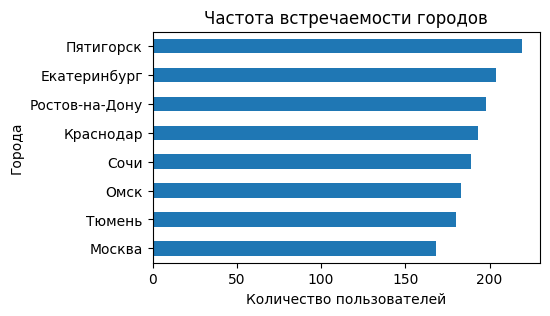

In [13]:
print('\nСреднее',df_users['city'].value_counts(ascending=True).median(),'\n')
display(df_users['city'].value_counts(ascending=True))
df_users['city'].value_counts(ascending=True).plot(kind='barh',figsize=(5,3));
plt.title('Частота встречаемости городов');
plt.ylabel('Города');
plt.xlabel('Количество пользователей');

Пользователи с подпиской и без:
 free     835
ultra    699
Name: subscription_type, dtype: int64


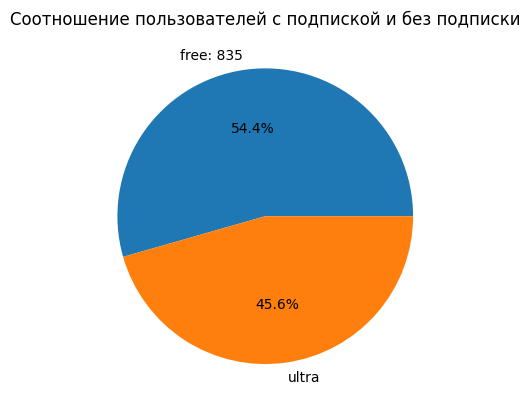

In [14]:
# Cоотношение пользователей с подпиской и без подписки
print('Пользователи с подпиской и без:\n',df_users['subscription_type'].value_counts())

plt.title('Cоотношение пользователей с подпиской и без подписки');
plt.pie(df_users['subscription_type'].value_counts(), labels=['free: 835','ultra'],autopct='%1.1f%%')
plt.show();

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

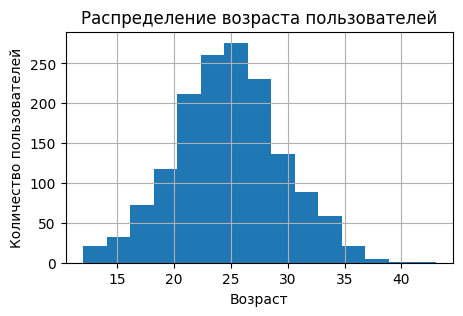

In [15]:
# возраст пользователей
display(df_users['age'].describe())
df_users.hist('age',figsize=(5,3),bins=15);
plt.title('Распределение возраста пользователей');
plt.xlabel('Возраст');
plt.ylabel('Количество пользователей');

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

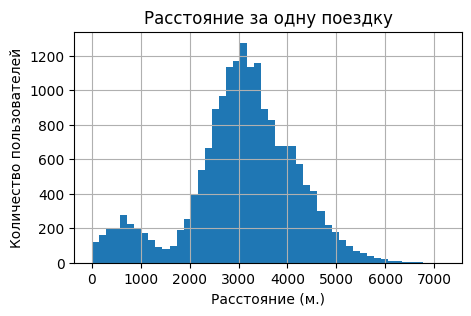

In [16]:
# расстояние, которое пользователь преодолел за одну поездку
display(df_riders['distance'].describe())
df_riders.hist('distance',bins=50,figsize=(5,3));
plt.title('Расстояние за одну поездку');
plt.xlabel('Расстояние (м.)');
plt.ylabel('Количество пользователей');

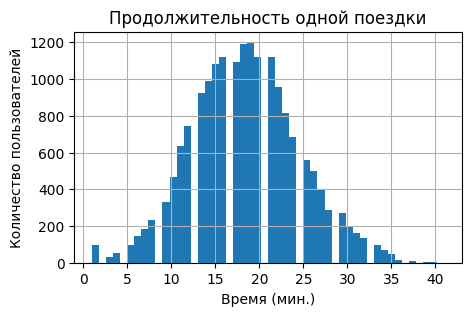

In [17]:
# продолжительность поездок
df_riders.hist('duration',bins=50,figsize=(5,3));
plt.title('Продолжительность одной поездки');
plt.xlabel('Время (мин.)');
plt.ylabel('Количество пользователей');

Рассмотрим более подробно информацию о поездках продолжительностью близкой к 0.  Интересующие нас поездки должны быть длительностью меньше минуты.
Рассмотрим как распределяется расстояние и время для таких поездок.

In [18]:
df_riders.query('duration <=1').head()

,user_id,distance,duration,date,month
6531,701,4196.45,1.0,2021-08-31,8
6570,704,4830.82,1.0,2021-10-14,10
6680,712,4684.00,1.0,2021-03-04,3
6695,713,5215.64,1.0,2021-02-25,2
6768,718,5197.44,1.0,2021-02-11,2


In [19]:
df_riders.query('duration <=1')['distance'].describe()

count      95.000000
mean     5113.176737
std       658.254223
min      4030.310000
25%      4611.510000
50%      5052.770000
75%      5488.460000
max      7211.010000
Name: distance, dtype: float64

In [20]:
df_riders.query('duration <=1')['duration'].describe()

count    95.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: duration, dtype: float64

Мы видим, что среднее расстояние почти 5 километров, при длительности поездки в 1 минуту это невозможно.
Проверим, сколько таких данных у нас в датафрейме, если менее 10% мы сможем исключить их из выборки.

In [21]:
len(df_riders.query('duration <=1')) / len(df_riders)

0.005257914545052026

In [22]:
df_riders = df_riders.query('duration > 1')
len(df_riders.query('duration <=1'))

0

### Вывод для Шаг 3

Всего вданных представлены 1534 уникальных пользователя из 8 городов.  
Возможно два варианта пользования сервисом бесплатный (54%) и с подпиской (46%): free (835) и ultra (699).   
Наибольшее количество пользователей в Пятигорске (219), наименьшее в Москве (168). Медианное количетво пользователей - 191.  
Возраст пользователей варьируется от 12 до 43, большая часть пользователей (25-75 перцентили) в возврасте 22-28 лет, в среднем 25.  
Всего было совершенео 18068 поездок в пределах от 0.8 м до 7.2 км, медианное значение 3.1 км. 
Судя по гистограмме распределения дальности поездок самокаты чаще всего используются на двух расстояниях: примерно 0.6 км и 3.1 км.   
Такое распределение можно предположительно объяснить тем, что пользователи совершали коротки поездки, чтобы протестировать сервис.
На гистограмме распределения длительности поездок мы видим, что около нуля присуствует отдельностоящий пик - поездки длительность менее 1 минуты.  Мы исключили поездки длительность в 1 минуту, тк расстояние для них было неадекватно высоким ( в среднем 5 км). 
Такая короткая длительность могла возникнуть из-за неисправноси или потому, что сервис не подошел пользователю.   
Медианное время поездки 17.7 минут, больше всего поездок в диапозоне от 13 до 21 минут.

## Шаг 4. Объединение данных

In [23]:
#Объеденим данные о пользователях, поездках и подписках в один датафрейм и создадим 2 отдельных датафрейма.
df_all=df_users.merge(df_subs, on='subscription_type').merge(df_riders,on='user_id')
#для пользователей без подписки 
df_ultra=df_all.query('subscription_type=="ultra"')
#для пользователей с подпиской
df_free=df_all.query('subscription_type=="free"')

Таблица содержащая наибольшее количество строк в нашем случае - df_riders (17973). Мы обьеденили все данные методом merge с типом "inner" по столбцам содержащемимся в обоих присоединяемых таблицах. Проверим количество полученных строк.

In [24]:
display(len(df_all)) 
display(len(df_ultra) + (len(df_free)))

17973

17973

In [25]:
#проверим как вгылядят новые датафреймы
display(df_ultra.head())
df_free.head()

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.92,26.0,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.59,16.0,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.16,7.0,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.78,19.0,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.69,27.0,2021-08-28,8


,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
6500,700,Айдар,22,Омск,free,8,50,0,2515.69,15.0,2021-01-02,1
6501,700,Айдар,22,Омск,free,8,50,0,846.93,17.0,2021-02-01,2
6502,700,Айдар,22,Омск,free,8,50,0,4004.43,21.0,2021-02-04,2
6503,700,Айдар,22,Омск,free,8,50,0,1205.91,10.0,2021-02-10,2
6504,700,Айдар,22,Омск,free,8,50,0,3047.38,18.0,2021-02-14,2


In [26]:
#Проверим есть ли пересекающиеся значения id в обоих типах подписок.
df_free_id=df_free['user_id'].unique()
df_ultra_id=df_ultra['user_id'].unique()
set (df_free_id) & set (df_ultra_id)

set()

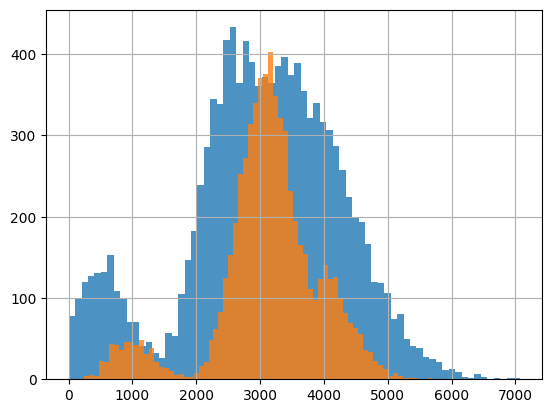

In [27]:
df_all.groupby(['subscription_type'])['distance'].hist(bins=70,alpha=0.8);

Визуализируем информацию для двух категорий пользователей о расстоянии и времени.

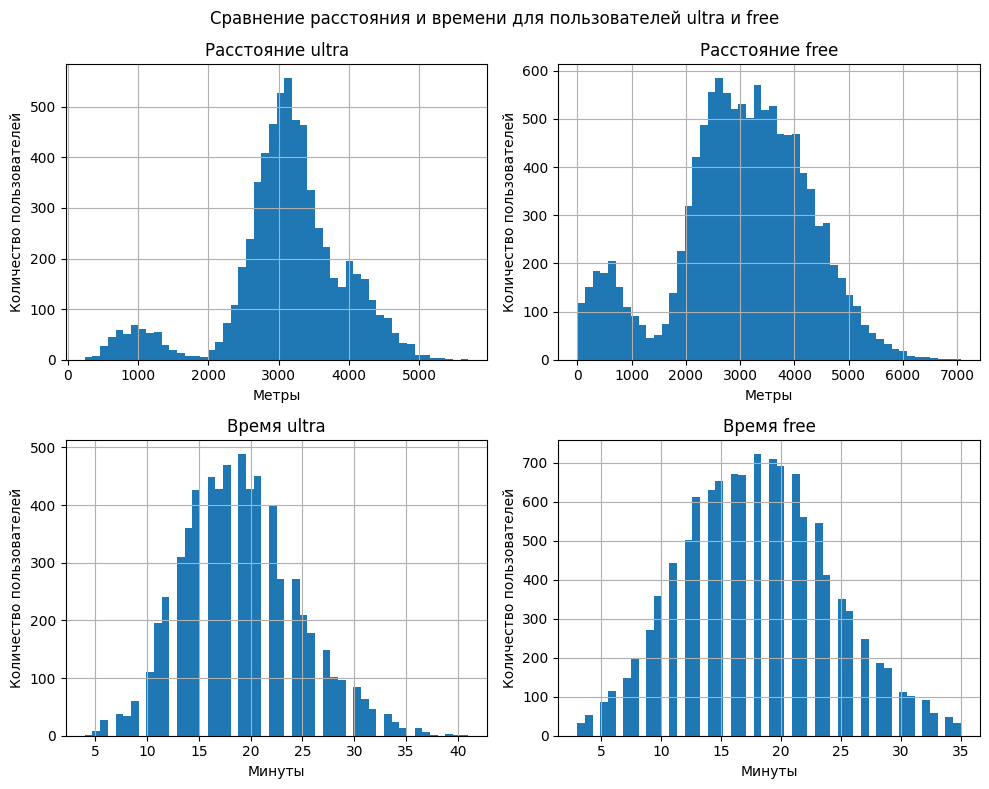

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) 
fig.suptitle('Сравнение расстояния и времени для пользователей ultra и free');
df_ultra.hist('distance', bins=50, ax=axs[0,0]);
df_free.hist('distance', bins=50, ax=axs[0,1]);
df_ultra.hist('duration',bins=50,ax=axs[1,0]);
df_free.hist('duration',bins=50,ax=axs[1,1]);
axs[0,0].set_title('Расстояние ultra')
axs[0,0].set_xlabel('Метры')
axs[0,0].set_ylabel('Количество пользователей')

axs[0,1].set_title('Расстояние free')
axs[0,1].set_xlabel('Метры')
axs[0,1].set_ylabel('Количество пользователей')

axs[1,0].set_title('Время ultra')
axs[1,0].set_xlabel('Минуты')
axs[1,0].set_ylabel('Количество пользователей')

axs[1,1].set_title('Время free')
axs[1,1].set_xlabel('Минуты')
axs[1,1].set_ylabel('Количество пользователей')

plt.tight_layout()  
plt.show()

### Вывод для Шаг 4

Как мы можем видить на графиках поведение друх групп пользователей несколько отличается. Пользователи ultra реже совешают поездки на небольшое расстояние. В основном ultra ездят на расстоние 2500-3700. Пользователи free ездят на расстояние в диапозоне 1800-4500 и поездки более равномерно распределены на всех расстояниях, чем в ultra( наблюдается чёткий пик на 3000). Так же видно, что пользователи ultra совершают поездки больше 35 минут, в отличии от freeкоторые почти не ездят так долго. К тому же пользовтали free чаще заканчивают поездки до 5 минут, чем ultra. Время использования самокатов распределено почти нормально для обоих категорий.

## Шаг 5. Подсчёт выручки

In [29]:
#Создаим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными. 
pt_all=(
    pd.pivot_table(
        df_all,
        index=['user_id','month'],
        values=['distance','duration','name','subscription_type'],
        aggfunc = {'duration': 'sum','distance': 'sum','name':'count', 'subscription_type':'first'}))

In [30]:
pt_all = pt_all.rename(columns = {'name':'rides_count'})
pt_all

distance  duration  rides_count subscription_type
user_id month                                                   
1       1       7027.51      42.0            2             ultra
        4        754.16       7.0            1             ultra
        8       6723.47      46.0            2             ultra
        10      5809.91      32.0            2             ultra
        11      7003.50      56.0            3             ultra
...                 ...       ...          ...               ...
1534    6       3409.47      26.0            2              free
        8       7622.45      48.0            2              free
        9       4928.17      23.0            1              free
        11     13350.02      78.0            4              free
        12      2371.71      16.0            1              free

[11300 rows x 4 columns]

In [31]:
#Объеденим наш датафрейм с агрегированными данными по пользователям о стоимости минуты поездки, старта поездки и стоимости подписки 
pt_all=(pt_all.merge(pd.pivot_table(df_all, 
                                    index=['user_id','month'], 
                                    values=['minute_price','start_ride_price','subscription_fee'],
                                    aggfunc ='mean'), 
                     on=['user_id','month']))
pt_all

distance  duration  rides_count subscription_type  \
user_id month                                                      
1       1       7027.51      42.0            2             ultra   
        4        754.16       7.0            1             ultra   
        8       6723.47      46.0            2             ultra   
        10      5809.91      32.0            2             ultra   
        11      7003.50      56.0            3             ultra   
...                 ...       ...          ...               ...   
1534    6       3409.47      26.0            2              free   
        8       7622.45      48.0            2              free   
        9       4928.17      23.0            1              free   
        11     13350.02      78.0            4              free   
        12      2371.71      16.0            1              free   

               minute_price  start_ride_price  subscription_fee  
user_id month                                                    
1       1                 6                 0               199  
        4                 6                 0               199  
        8                 6                 0               199  
        10                6                 0               199  
        11                6                 0               199  
...                     ...               ...               ...  
1534    6                 8                50                 0  
        8                 8                50                 0  
        9                 8                50                 0  
        11                8                50                 0  
        12                8                50                 0  

[11300 rows x 7 columns]

In [32]:
#Добавим новый столбец в котором посчитаем выручку для каждого месяца для каждого пользователя и оставим только интересующие нас столбцы
pt_all['revenue']=pt_all['start_ride_price'] * pt_all['rides_count']+ pt_all['minute_price'] * pt_all['duration'] + pt_all['subscription_fee']
pt_all=pt_all[['distance', 'duration','rides_count', 'revenue','subscription_type']]
pt_all

distance  duration  rides_count  revenue subscription_type
user_id month                                                            
1       1       7027.51      42.0            2    451.0             ultra
        4        754.16       7.0            1    241.0             ultra
        8       6723.47      46.0            2    475.0             ultra
        10      5809.91      32.0            2    391.0             ultra
        11      7003.50      56.0            3    535.0             ultra
...                 ...       ...          ...      ...               ...
1534    6       3409.47      26.0            2    308.0              free
        8       7622.45      48.0            2    484.0              free
        9       4928.17      23.0            1    234.0              free
        11     13350.02      78.0            4    824.0              free
        12      2371.71      16.0            1    178.0              free

[11300 rows x 5 columns]

### Вывод для Шаг 5

Мы составили сводную таблицу на основе объединённого датафрейма с необходимой нам информацией для дальнейшего анализа.  
Она содержит информацию о поездках для каждого пользователя за каждый месяц: суммарное расстояние, суммарное время,  количество поездок, выручку, тип подписки.

## Шаг 6. Проверка гипотез

display(df_free.head())
df_ultra.head()

### Гипотеза 1

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? 
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. 
Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проведем двухвыборочный t-тест для независимых выборок:  
H0: пользователи с подпиской и без подписки тратят одинаковое время на поездки  
H1: пользователи с подпиской тратят больше времени на поездки  

In [33]:
results = st.ttest_ind(df_ultra['duration'], df_free['duration'], alternative='greater')
alpha = 0.05 
print('Среднее расстояние для ultra',df_ultra['duration'].median())
print('Среднее расстояние для free',df_free['duration'].median())
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Среднее расстояние для ultra 19.0
Среднее расстояние для free 18.0
p-значение: 8.577910347796266e-28
Отвергаем нулевую гипотезу


Поскольку p-значение оказалось меньше статистической значимости, есть основания предполагать, что пользователи с подпиской тратят больше времени на поездки.

Выборки не обязательно должны быть равны для проведения теста, но на всякий случай сделаем выборкы равного размера и еще раз проверим гипотезу.

In [34]:
print ('До: ',len(df_ultra['duration']), len(df_free['duration']))
df_free_sampled = df_free.sample(n=6500, random_state=1, replace=False)
print ('После: ',len(df_ultra['duration']), len(df_free_sampled['duration']))

До:  6500 11473
После:  6500 6500


In [35]:
results_sampled = st.ttest_ind(df_ultra['duration'], df_free_sampled['duration'], alternative='greater')
alpha_sampled = 0.05 
print('p-значение:', results_sampled.pvalue)

if results_sampled.pvalue < alpha:
    print('Всё еще отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.2827127248688695e-23
Всё еще отвергаем нулевую гипотезу


### Гипотеза 2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 
Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
Проверьте гипотезу и сделайте выводы.

Проведем одновыборочный t-тест:
H0: расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров
H1: пользователи с подпиской тратят больше времени на поездки

In [36]:
print('Среднее выборки: ', df_ultra['distance'].mean())

Среднее выборки:  3115.445430769231


In [37]:
sample_mean_distance = df_ultra['distance']
value_distance = 3130
alf_distance = 0.05 
results_mean_distance = st.ttest_1samp(sample_mean_distance,value_distance,alternative='greater')
print('p-значение:', results_mean_distance.pvalue)

if results_mean_distance.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет основания отвергуть нулевую гипотезу')

p-значение: 0.9195362605842414
Нет основания отвергуть нулевую гипотезу


Гипотеза проверена и можно сказать, что пользователи с подпиской за одну поездку не проезжают расстояние превышающее 3130 метров.

### Гипотеза 3

Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
Для начала приведем выборки к одному размеру.  
H0: Помесячная выручка между пользователями двух категорий равна  
H1: Помесячная выручка от пользователей с подпиской больше выручки от пользователей без подписки  

In [38]:
print(len(pt_all.query('subscription_type=="ultra"')['revenue']))
print(len(pt_all.query('subscription_type=="free"')['revenue']))

4533
6767


In [39]:
sample_rev_ultra=pt_all.query('subscription_type=="ultra"')['revenue']
sample_rev_free=pt_all.query('subscription_type=="free"')['revenue'].sample(n=4533, random_state=1, replace=False)
print(len(sample_rev_free))
print(len(sample_rev_ultra))

4533
4533


In [40]:
results_rev = (st.ttest_ind(sample_rev_ultra, sample_rev_free,alternative='greater'))
alpha_rev = 0.05 
print('Средняя выручка для ultra',pt_all.query('subscription_type=="ultra"')['revenue'].median())
print('Средняя выручка для free',pt_all.query('subscription_type=="free"')['revenue'].median())

print('p-значение:', results_rev.pvalue)

if results_rev.pvalue < alpha_rev:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средняя выручка для ultra 337.0
Средняя выручка для free 274.0
p-значение: 1.1254115552093663e-27
Отвергаем нулевую гипотезу


На основании результата (p-значение крайне малое) мы можем полагать, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

### Гипотеза 4 - вопрос

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение.
Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. 
Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 
Какой тест вам понадобился бы для проверки этой гипотезы?

Поскольку две выборки будут связаны между собой,  для проверки можно использовать использовать метод st.ttest_rel().
Так же потребуется две выборки old_server и new_server. В качестве аргумента метода можно использовать alternative = 'greater' для H0 (количество обращений равно) и H1(количество обращений до изменений было больше).

### Вывод для шаг 6

Были проверено 3 гипотезы и на основании результатов мы можем утверждать что:    
- пользователи с подпиской тратят больше времени на поездки;
- пользователи с подпиской за одну поездку не проезжают расстояние превышающее 3130 метров;   
- помесячная подписка от пользователей с подпиской выше, чем от пользователей без подписки.
  
Так же мы ответили на вопрос об обращении в тех поддержку:

Для проверки предлагаем использовать использовать метод st.ttest_rel(old_server, new_server,alternative = 'greater'), где old_server- выборка обращений до изменений, new_server - выборка после.

# Итоги исследования

Мы рассмотрели данные о пользователях сервиса.
В результате анализа получились следующие средние данные: на 1 город – 191 пользователь, возраст - 25 лет, поездка - 3.1 км., время поездки - 17.7 минут.  
Так же мы увидели, что:
- всего в данных 1565 пользователях  
- есть информация о 18068 поездках  
- представлены 8 городов
- пользователи соотносятся почти поровну free (54%) и ultra (46%).
- данные содержат малое количество дубликатов и аномалий, который мы легко устранили, не опасаясь за общий объем данных  
- всю имеющуюся информацию без проблем можно объединить в один датафрейм, позволяющий проанализировать сводные данные
- время использования самокатов распределено почти нормально для обоих категорий.

Благодаря составленным графикам можно увидеть как  поведение друх групп пользователей отличается: ultra реже совершают поездки на небольшое расстояние, поездки более равномерно распределены на всех расстояниях для free, ultra совершают поездки больше 35 минут, в отличии от free.  

Мы составили сводную таблицу на основе объединённого датафрейма с информацией о поездках для каждого пользователя за каждый месяц: суммарное расстояние, суммарное время, количество поездок, выручку, тип подписки.  

Мы рассмотрели 4 гипотезы и пришли к следующим выводам:  
1.	Пользователи с подпиской тратят больше времени на поездки. Среднее расстояние для ultra 19 мин. Среднее расстояние для free 18 мин.  
2.	Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Средняя месячная выручка для ultra 337 руб., для -  free 274.0  
3.	Пользователи с подпиской за одну поездку не проезжают расстояние превышающее 3130 метров.  
4.	На теоретическую ситуацию мы дали рекомендацию использовать использовать метод st.ttest_rel(), используя две выборки old_server , new_server и alternative = 'greater'

Описанные выше результаты и сводные данные  рекомендуем передать продакт-менеджерам сервиса для дальнейшего использования.Так же рекомендовано составить баг-репорт, чтобы устранить будущие проблемы с данными.